### Author: Vaishnav Krishna P
#### Email: vyshnavkrishnap2020@gmail.com
##### AFFLIATION: Electronics Dept, MCUT, Taiwan

In [39]:
pd.set_option('display.max_colwidth', None)

In [40]:
### Loading the dataset 
import pandas as pd

df = pd.read_json("../BIRD_DEV_DATA/dev.json")

In [41]:
# There are 89 Questions related to the california_schools
california_df = df[df['db_id'] == 'california_schools']

In [42]:
california_df.head()

question_id               db_id  \
0            0  california_schools   
1            1  california_schools   
2            2  california_schools   
3            3  california_schools   
4            4  california_schools   

                                                                                                        question  \
0                     What is the highest eligible free rate for K-12 students in the schools in Alameda County?   
1               Please list the lowest three eligible free rates for students aged 5-17 in continuation schools.   
2                      Please list the zip code of all the charter schools in Fresno County Office of Education.   
3  What is the unabbreviated mailing street address of the school with the highest FRPM count for K-12 students?   
4             Please list the phone numbers of the direct charter-funded schools that are opened after 2000/1/1.   

                                                                                                evidence  \
0                           Eligible free rate for K-12 = `Free Meal Count (K-12)` / `Enrollment (K-12)`   
1  Eligible free rates for students aged 5-17 = `Free Meal Count (Ages 5-17)` / `Enrollment (Ages 5-17)`   
2                                 Charter schools refers to `Charter School (Y/N)` = 1 in the table fprm   
3                                                                                                          
4                                       Charter schools refers to `Charter School (Y/N)` = 1 in the frpm   

                                                                                                                                                                                                                                                                                        SQL  \
0                                                                                                      SELECT `Free Meal Count (K-12)` / `Enrollment (K-12)` FROM frpm WHERE `County Name` = 'Alameda' ORDER BY (CAST(`Free Meal Count (K-12)` AS REAL) / `Enrollment (K-12)`) DESC LIMIT 1   
1  SELECT `Free Meal Count (Ages 5-17)` / `Enrollment (Ages 5-17)` FROM frpm WHERE `Educational Option Type` = 'Continuation School' AND `Free Meal Count (Ages 5-17)` / `Enrollment (Ages 5-17)` IS NOT NULL ORDER BY `Free Meal Count (Ages 5-17)` / `Enrollment (Ages 5-17)` ASC LIMIT 3   
2                                                                                                        SELECT T2.Zip FROM frpm AS T1 INNER JOIN schools AS T2 ON T1.CDSCode = T2.CDSCode WHERE T1.`District Name` = 'Fresno County Office of Education' AND T1.`Charter School (Y/N)` = 1   
3                                                                                                                                                     SELECT T2.MailStreet FROM frpm AS T1 INNER JOIN schools AS T2 ON T1.CDSCode = T2.CDSCode ORDER BY T1.`FRPM Count (K-12)` DESC LIMIT 1   
4                                                                                  SELECT T2.Phone FROM frpm AS T1 INNER JOIN schools AS T2 ON T1.CDSCode = T2.CDSCode WHERE T1.`Charter Funding Type` = 'Directly funded' AND T1.`Charter School (Y/N)` = 1 AND T2.OpenDate > '2000-01-01'   

  difficulty  
0     simple  
1   moderate  
2     simple  
3     simple  
4   moderate

In [43]:
california_df['difficulty'].value_counts()

difficulty
simple         54
moderate       30
challenging     5
Name: count, dtype: int64

<Axes: xlabel='difficulty'>

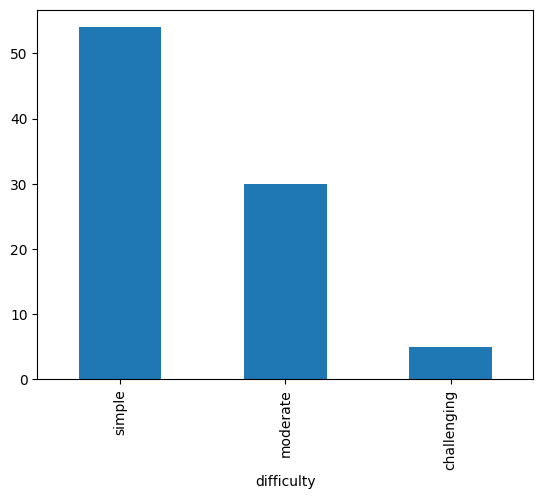

In [44]:
california_df['difficulty'].value_counts().plot(kind='bar')

In [45]:
# Any Questions duplicated ?
california_df.duplicated().sum()

np.int64(0)

- There is no questions duplicated

In [54]:
# Extracting only question, SQL, and difficulty 
seleted_columns = ['question', 'SQL', 'difficulty']

selected_data = california_df[seleted_columns]

In [55]:
selected_data

question  \
0                                                                                                                                                                                                       What is the highest eligible free rate for K-12 students in the schools in Alameda County?   
1                                                                                                                                                                                                 Please list the lowest three eligible free rates for students aged 5-17 in continuation schools.   
2                                                                                                                                                                                                        Please list the zip code of all the charter schools in Fresno County Office of Education.   
3                                                                                                                                                                                    What is the unabbreviated mailing street address of the school with the highest FRPM count for K-12 students?   
4                                                                                                                                                                                               Please list the phone numbers of the direct charter-funded schools that are opened after 2000/1/1.   
5                                                                                                                                                                                         How many schools with an average score in Math greater than 400 in the SAT test are exclusively virtual?   
6                                                                                                                                                               Among the schools with the SAT test takers of over 500, please list the schools that are magnet schools or offer a magnet program.   
7                                                                                                                                                                                What is the phone number of the school that has the highest number of test takers with an SAT score of over 1500?   
8                                                                                                                                                                                              What is the number of SAT test takers of the schools with the highest FRPM count for K-12 students?   
9                                                                                                                                                                         Among the schools with the average score in Math over 560 in the SAT test, how many schools are directly charter-funded?   
10                                                                                                                                                                        For the school with the highest average score in Reading in the SAT test, what is its FRPM count for students aged 5-17?   
11                                                                                                                                                                                                                       Please list the codes of the schools with a total enrollment of over 500.   
12                                                                                                                                                                       Among the schools with an SAT excellence rate of over 0.3, what is the highest eligible free rate for students aged 5-17?   
13                                                                                                                                                                    

In [58]:
### Save this as a CSV, EXCEL FILE
selected_data.to_csv('SelectedData/selected_data.csv', index=False)
selected_data.to_excel('SelectedData/selected_data.xlsx', index=False)